<a href="https://colab.research.google.com/github/duanasq/learning-ds/blob/main/Matplotlib_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following tutorial at https://towardsdatascience.com/learn-how-to-create-animated-graphs-in-python-fce780421afe

In [1]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(url, delimiter=',', header='infer')
df_interest = df.loc[
    df['Country/Region'].isin(['United Kingdom', 'US', 'Italy', 'Germany'])
    & df['Province/State'].isna()]
df_interest.rename(
    index=lambda x: df_interest.at[x, 'Country/Region'], inplace=True)
df1 = df_interest.transpose()
df1 = df1.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
df1 = df1.loc[(df1 != 0).any(1)]
df1.index = pd.to_datetime(df1.index)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [2]:
from matplotlib import rc
rc('animation', html='jshtml')

In [3]:
df1

,Germany,Italy,US,United Kingdom
2020-02-21,0,1,0,0
2020-02-22,0,2,0,0
2020-02-23,0,3,0,0
2020-02-24,0,7,0,0
2020-02-25,0,10,0,0
...,...,...,...,...
2022-03-08,124769,156201,961843,162359
2022-03-09,125028,156357,963819,162482
2022-03-10,125276,156493,965464,162624
2022-03-11,125528,156649,967165,162738


Text(0, 0.5, 'Deaths')

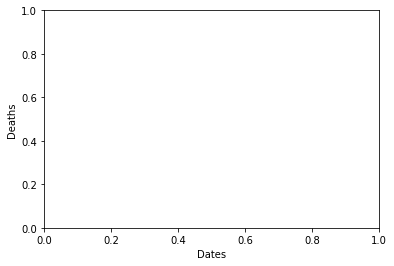

In [4]:
color = ['red', 'green', 'blue', 'orange']
fig, ax = plt.subplots()
ax.set_xlabel('Dates')
ax.set_ylabel('Deaths')

In [8]:
def buildmebarchart(i=int):
    ax.legend(df1.columns)
    p = ax.plot(df1[:i*5].index, df1[:i*5].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i])
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
animator

In [7]:
ax.clear()